## Exercise 1.1

In this exercise we will use the Amazon sentiment analysis data (Blitzer et al., 2007), where the goal is to classify text documents as expressing a positive or negative sentiment (i.e., a classification problem with two classes). We are going to focus on book reviews. To load the data, type:

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import lxmls.readers.sentiment_reader as srs
scr = srs.SentimentCorpus("books")

This will load the data in a bag-of-words representation where rare words (occurring less than 5 times in the training data) are removed.

1. Implement the Naive Bayes algorithm. Open the file `multinomial_naive_bayes.py`,  which is inside the classifiers folder. In the MultinomialNaiveBayes class you will find the train method. We have already placed some code in that file to help you get started.
    
2. After implementing, run Naive Bayes with the multinomial model on the Amazon dataset (sentiment classification) and report results both for training and testing

In [27]:
import lxmls.classifiers.multinomial_naive_bayes as mnbb


mnb = mnbb.MultinomialNaiveBayes()
params_nb_sc = mnb.train(scr.train_X,scr.train_y)

y_pred_train = mnb.test(scr.train_X,params_nb_sc)
acc_train = mnb.evaluate(scr.train_y, y_pred_train)

y_pred_test = mnb.test(scr.test_X,params_nb_sc)
acc_test = mnb.evaluate(scr.test_y, y_pred_test)
print("Multinomial Naive Bayes Amazon Sentiment Accuracy train: %f test: %f"%(acc_train,acc_test))

Multinomial Naive Bayes Amazon Sentiment Accuracy train: 0.974375 test: 0.795000


Observe that words that were not observed at training time cause problems at testtime. Why? To  solve this problem, apply a simple add-one smoothing technique:  replace the expression in Eq. 1.9 for the estimation of the conditional probabilities by
    
${\hat P}(w_j|c_k) = \frac{1+\sum_ {m \in \mathcal{I}_k} n_j(x^m)}{J + \sum_{i=1}^J \sum_ {m\in \mathcal{I}_k} n_i(x^m)}.$

where $J$ is the number of distinct words. This is a widely used smoothing strategy which has a Bayesian interpretation: it corresponds to choosing a uniform prior for the word distribution on both classes, and to replace the maximum likelihood criterion by a maximum a posteriori approach. This is a form of regularization, preventing the model from overfitting on the training data. See e.g. for more information. Report the new accuracies.

## Exercise 1.2

We provide an implementation of the perceptron algorithm in the class Perceptron
(file `perceptron.py`).

Run the following commands to generate a simple dataset

In [34]:
%matplotlib inline
import lxmls.readers.simple_data_set as sds
sd = sds.SimpleDataSet(
    nr_examples=100,
    g1=[[-1,-1],1], 
    g2=[[1,1],1], 
    balance=0.5,
    split=[0.5,0,0.5]
)

Run the perceptron algorithm on the simple dataset previously generated and report its train and test set accuracy:

Rounds: 0 Accuracy: 0.900000
[[-1.69314718 -1.69314718]
 [-1.          1.        ]
 [-1.          1.        ]]
Rounds: 1 Accuracy: 1.000000
Rounds: 2 Accuracy: 1.000000
Rounds: 3 Accuracy: 1.000000
Rounds: 4 Accuracy: 1.000000
Rounds: 5 Accuracy: 1.000000
[[-1.69314718 -1.69314718]
 [-1.          1.        ]
 [-1.          1.        ]]
Rounds: 6 Accuracy: 1.000000
Rounds: 7 Accuracy: 1.000000
Rounds: 8 Accuracy: 1.000000
Rounds: 9 Accuracy: 1.000000
Rounds: 10 Accuracy: 1.000000
[[-1.69314718 -1.69314718]
 [-1.          1.        ]
 [-1.          1.        ]]
Perceptron Simple Dataset Accuracy train: 0.980000 test: 0.960000


/Users/andst/projects/lxmls-toolkit/lxmls/readers/simple_data_set.py:96: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g--" (-> color='g'). The keyword argument will take precedence.
  axis.plot(x, y_star, 'g--', c=colour, label=name, linewidth=2)


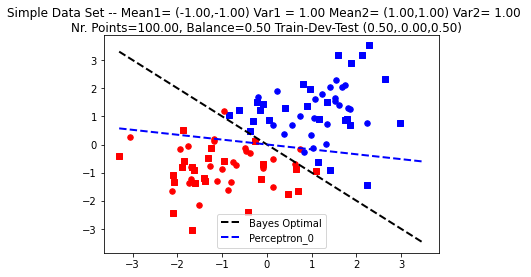

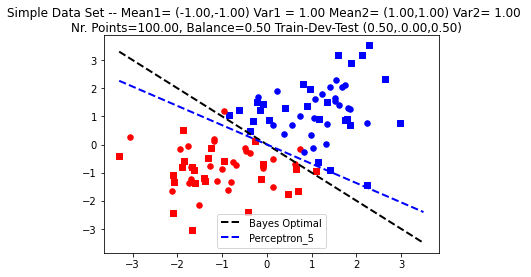

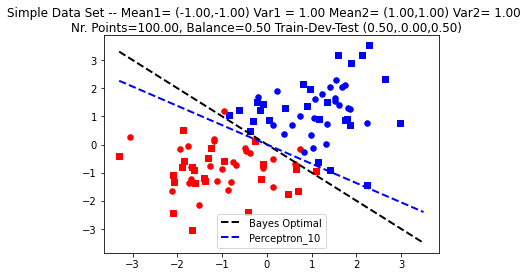

In [50]:
import lxmls.classifiers.perceptron as percc


perc = percc.Perceptron(nr_epochs=11)
params_perc_sd, all_params = perc.train(sd.train_X,sd.train_y, sd)

y_pred_train = perc.test(sd.train_X,params_perc_sd)
acc_train = perc.evaluate(sd.train_y, y_pred_train)

y_pred_test = perc.test(sd.test_X,params_perc_sd)
acc_test = perc.evaluate(sd.test_y, y_pred_test)
print("Perceptron Simple Dataset Accuracy train: %f test: %f"%(acc_train, acc_test))

[[-1.69314718 -1.69314718]
 [-1.          1.        ]
 [-1.          1.        ]]


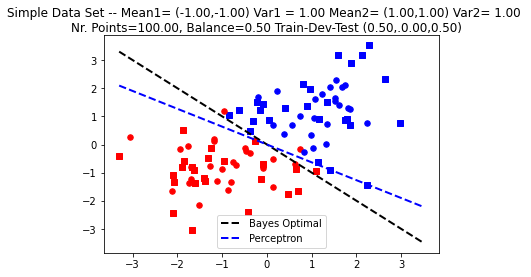

In [40]:
fig, axis = sd.plot_data("osx")
fig, axis = sd.add_line(fig, axis, params_perc_sd, "Perceptron", "blue")

Change the code to save the intermediate weight vectors, and plot them every five iterations. What do you observe?

## Exercise 1.3
We provide an implementation of the MIRA algorithm. Compare it with the perceptron for various values of $\lambda$

In [61]:
import lxmls.classifiers.mira as mirac


mira = mirac.Mira()
mira.regularizer = 0.5 # This is lambda
params_mira_sd = mira.train(sd.train_X,sd.train_y)
y_pred_train = mira.test(sd.train_X,params_mira_sd)
acc_train = mira.evaluate(sd.train_y, y_pred_train)
y_pred_test = mira.test(sd.test_X,params_mira_sd)
acc_test = mira.evaluate(sd.test_y, y_pred_test)
print("Mira Simple Dataset Accuracy train: %f test: %f"%(acc_train, acc_test))

Rounds: 0 Accuracy: 0.960000
Rounds: 1 Accuracy: 0.920000
Rounds: 2 Accuracy: 0.980000
Rounds: 3 Accuracy: 1.000000
Rounds: 4 Accuracy: 1.000000
Rounds: 5 Accuracy: 1.000000
Rounds: 6 Accuracy: 1.000000
Rounds: 7 Accuracy: 1.000000
Rounds: 8 Accuracy: 1.000000
Rounds: 9 Accuracy: 1.000000
Mira Simple Dataset Accuracy train: 0.980000 test: 0.960000


Compare the results achieved and separating hiperplanes found.

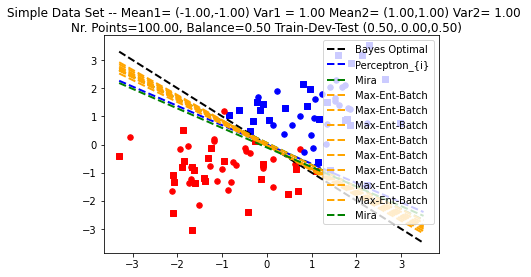

In [62]:
fig, axis = sd.add_line(fig, axis, params_mira_sd, "Mira","green")
fig

## Exercise 1.4
We provide an implementation of the L-BFGS algorithm for training maximum entropy models in the class MaxEnt batch, as well as an implementation of the SGD algorithm in the class `MaxEnt online`.

Objective = 0.6931471805599453
Objective = 0.5475612499276493
Objective = 0.43014155945673505
Objective = 0.4188225267434088
Objective = 0.41811455842552014
Objective = 0.418110231987881
Objective = 0.41811022201186937
Objective = 0.41811022142626836
Max-Ent batch Simple Dataset Accuracy train: 1.000000 test: 0.960000


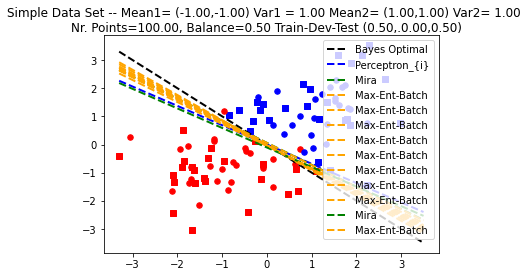

In [63]:
import lxmls.classifiers.max_ent_batch as mebc


me_lbfgs = mebc.MaxEntBatch()
me_lbfgs.regularizer = 0.7

params_meb_sd = me_lbfgs.train(sd.train_X,sd.train_y)

y_pred_train = me_lbfgs.test(sd.train_X,params_meb_sd)
acc_train = me_lbfgs.evaluate(sd.train_y, y_pred_train)

y_pred_test = me_lbfgs.test(sd.test_X,params_meb_sd)
acc_test = me_lbfgs.evaluate(sd.test_y, y_pred_test)

print(
    "Max-Ent batch Simple Dataset Accuracy train: %f test: %f" % 
    (acc_train,acc_test)
)
fig, axis = sd.add_line(fig, axis, params_meb_sd, "Max-Ent-Batch","orange")
fig

Train a maximum entropy model using L-BFGS, on the Amazon dataset (try different values of $\lambda$) and report training and test set accuracy. What do you observe?

In [135]:
me_lbfgs = mebc.MaxEntBatch()
#me_lbfgs.regularizer = 1.0
me_lbfgs.regularizer = 0.001

params_meb_sc = me_lbfgs.train(scr.train_X,scr.train_y)

y_pred_train = me_lbfgs.test(scr.train_X,params_meb_sc)
acc_train = me_lbfgs.evaluate(scr.train_y, y_pred_train)

y_pred_test = me_lbfgs.test(scr.test_X,params_meb_sc)
acc_test = me_lbfgs.evaluate(scr.test_y, y_pred_test)
print(
    "Max-Ent Batch Amazon Sentiment Accuracy train: %f test: %f" % 
    (acc_train, acc_test)
)

Objective = 0.6931471805599452
Objective = 1.8574935918850344
Objective = 0.6851316069191729
Objective = 0.6557745906993526
Objective = 0.5983229025844741
Objective = 0.5446005602565618
Objective = 0.4276153734515516
Objective = 0.3398653048681251
Objective = 0.2899759842906546
Objective = 0.23386447934538265
Objective = 0.1939733391999348
Objective = 0.1441278891638126
Objective = 0.12291318643587822
Objective = 0.0995936539593656
Objective = 0.09295126655501748
Objective = 0.08566586250664482
Objective = 0.08093350088182286
Objective = 0.07662447120853436
Objective = 0.0734346068356782
Objective = 0.072029063692471
Objective = 0.0708168052847153
Objective = 0.06922450454143028
Objective = 0.0678400618505984
Objective = 0.0705221082884297
Objective = 0.06645485990480601
Objective = 0.06478883636381777
Objective = 0.06399583466296531
Objective = 0.06327150080977353
Objective = 0.06286833250729383
Objective = 0.06259381588283373
Objective = 0.06363727835822887
Objective = 0.062500367520

Now, fix $\lambda$ = 1.0 and train with SGD (you might try to adjust the initial step). Compare the objective values obtained during training with those obtained with L-BFGS. What do you observe?

In [99]:
import lxmls.classifiers.max_ent_online as meoc


me_sgd = meoc.MaxEntOnline(initial_step=2.0, nr_epochs=30, regularizer=1.0)
#me_sgd.regularizer = 1.5

params_meo_sc = me_sgd.train(scr.train_X,scr.train_y)

y_pred_train = me_sgd.test(scr.train_X,params_meo_sc)
acc_train = me_sgd.evaluate(scr.train_y, y_pred_train)

y_pred_test = me_sgd.test(scr.test_X,params_meo_sc)
acc_test = me_sgd.evaluate(scr.test_y, y_pred_test)
print(
    "Max-Ent Online Amazon Sentiment Accuracy train: %f test: %f" % 
    (acc_train, acc_test)
)

Epochs: 0 Objective: 2.613442
Epochs: 0 Accuracy: 0.816875
Epochs: 1 Objective: 0.666123
Epochs: 1 Accuracy: 0.851875
Epochs: 2 Objective: 0.644994
Epochs: 2 Accuracy: 0.861250
Epochs: 3 Objective: 0.637592
Epochs: 3 Accuracy: 0.858125
Epochs: 4 Objective: 0.633867
Epochs: 4 Accuracy: 0.858125
Epochs: 5 Objective: 0.631630
Epochs: 5 Accuracy: 0.857500
Epochs: 6 Objective: 0.630155
Epochs: 6 Accuracy: 0.859375
Epochs: 7 Objective: 0.629116
Epochs: 7 Accuracy: 0.858750
Epochs: 8 Objective: 0.628344
Epochs: 8 Accuracy: 0.858750
Epochs: 9 Objective: 0.627748
Epochs: 9 Accuracy: 0.859375
Epochs: 10 Objective: 0.627271
Epochs: 10 Accuracy: 0.859375
Epochs: 11 Objective: 0.626879
Epochs: 11 Accuracy: 0.859375
Epochs: 12 Objective: 0.626550
Epochs: 12 Accuracy: 0.859375
Epochs: 13 Objective: 0.626269
Epochs: 13 Accuracy: 0.860000
Epochs: 14 Objective: 0.626026
Epochs: 14 Accuracy: 0.860000
Epochs: 15 Objective: 0.625813
Epochs: 15 Accuracy: 0.858125
Epochs: 16 Objective: 0.625624
Epochs: 16 Ac

## Exercise 1.5
Run the SVM primal algorithm. Then, repeat the MaxEnt exercise now using SVMs, for several values of $\lambda$:

In [106]:
import lxmls.classifiers.svm as svmc


svm = svmc.SVM()
svm.regularizer = 0.01 # This is lambda

params_svm_sd = svm.train(sd.train_X,sd.train_y)

y_pred_train = svm.test(sd.train_X,params_svm_sd)
acc_train = svm.evaluate(sd.train_y, y_pred_train)

y_pred_test = svm.test(sd.test_X,params_svm_sd)
acc_test = svm.evaluate(sd.test_y, y_pred_test)
print("SVM Online Simple Dataset Accuracy train: {} test: {}".format(acc_train,acc_test))

Epochs: 0 Objective: 0.201344
Epochs: 0 Accuracy: 0.920000
Epochs: 1 Objective: 0.137673
Epochs: 1 Accuracy: 0.960000
Epochs: 2 Objective: 0.127598
Epochs: 2 Accuracy: 1.000000
Epochs: 3 Objective: 0.122633
Epochs: 3 Accuracy: 1.000000
Epochs: 4 Objective: 0.119093
Epochs: 4 Accuracy: 1.000000
Epochs: 5 Objective: 0.116338
Epochs: 5 Accuracy: 1.000000
Epochs: 6 Objective: 0.114082
Epochs: 6 Accuracy: 1.000000
Epochs: 7 Objective: 0.112173
Epochs: 7 Accuracy: 1.000000
Epochs: 8 Objective: 0.110518
Epochs: 8 Accuracy: 1.000000
Epochs: 9 Objective: 0.109058
Epochs: 9 Accuracy: 1.000000
SVM Online Simple Dataset Accuracy train: 1.0 test: 0.96


Compare the results achieved and separating hiperplanes found.

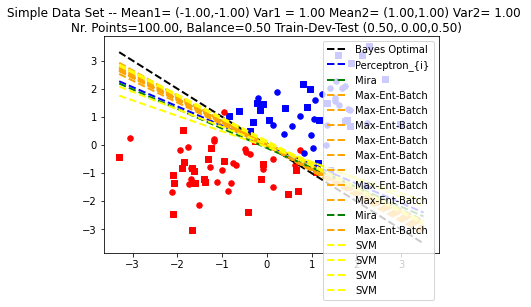

In [107]:
fig, axis = sd.add_line(fig, axis, params_svm_sd, "SVM", "yellow")
fig

In [134]:
svm = svmc.SVM(initial_step=7.0, nr_epochs=20)
svm.regularizer = 0.3 # This is lambda

params_svm_sc = svm.train(scr.train_X,scr.train_y)

y_pred_train = svm.test(scr.train_X,params_svm_sc)
acc_train = svm.evaluate(scr.train_y, y_pred_train)

y_pred_test = svm.test(scr.test_X,params_svm_sc)
acc_test = svm.evaluate(scr.test_y, y_pred_test)

print("SVM Online Amazon Sentiment Accuracy train: {} test: {}".format(acc_train,acc_test))

Epochs: 0 Objective: 9.070762
Epochs: 0 Accuracy: 0.846875
Epochs: 1 Objective: 0.906489
Epochs: 1 Accuracy: 0.903125
Epochs: 2 Objective: 0.714418
Epochs: 2 Accuracy: 0.905625
Epochs: 3 Objective: 0.649082
Epochs: 3 Accuracy: 0.926250
Epochs: 4 Objective: 0.612210
Epochs: 4 Accuracy: 0.931875
Epochs: 5 Objective: 0.591525
Epochs: 5 Accuracy: 0.936250
Epochs: 6 Objective: 0.568090
Epochs: 6 Accuracy: 0.935000
Epochs: 7 Objective: 0.563142
Epochs: 7 Accuracy: 0.938125
Epochs: 8 Objective: 0.551738
Epochs: 8 Accuracy: 0.940000
Epochs: 9 Objective: 0.547232
Epochs: 9 Accuracy: 0.940000
Epochs: 10 Objective: 0.540790
Epochs: 10 Accuracy: 0.941250
Epochs: 11 Objective: 0.535950
Epochs: 11 Accuracy: 0.941250
Epochs: 12 Objective: 0.531251
Epochs: 12 Accuracy: 0.943125
Epochs: 13 Objective: 0.528641
Epochs: 13 Accuracy: 0.944375
Epochs: 14 Objective: 0.525604
Epochs: 14 Accuracy: 0.943125
Epochs: 15 Objective: 0.524140
Epochs: 15 Accuracy: 0.945000
Epochs: 16 Objective: 0.520920
Epochs: 16 Ac